# What is K-Means Clustering?

## Introduction

### K-Means is one of the most popular machine learning algorithms used for clustering data into groups based on similarity. The goal of K-Means is to divide a dataset into K distinct, non-overlapping clusters, where each data point belongs to the cluster with the nearest mean (centroid). It’s commonly used for customer segmentation, market analysis, pattern recognition, and image compression.



## How does K-Means Clustering work?

### The K-Means algorithm follows these steps:

1.   Choose the number of clusters (K)
2.   Initialize K centroids randomly
3.   Assign each data point to the nearest centroid, forming K clusters
4.   Recalculate the centroids as the mean of the points in each cluster
5.   Repeat steps 3 and 4 until the centroids no longer change significantly

### This process helps the algorithm find compact and well-separated clusters.

## Choosing the right K

### Selecting the right number of clusters (K) is important. One popular technique for finding the optimal K is the Elbow Method, which involves:

*   Running K-Means with different values of K
*   Plotting the Within-Cluster Sum of Squares (WCSS) for each K
*   Looking for the “elbow” point where adding more clusters doesn’t significantly reduce WCSS

## Advantages and Limitations

### Advantages

*   Simple and easy to implement
*   Efficient and fast for large datasets
*   Works well when clusters are clearly separated and spherical in shape

### Limitations

*   You need to specify K ahead of time
*   Not suitable for non-spherical clusters or datasets with different densities
*   Sensitive to outliers and the initial placement of centroids
*   Can converge to local minima, which might not be the best solution


# K-Means Clustering in Action

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df = df.drop(columns=['year', 'clinical_notes'])
df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 2, random_state = 42, n_init = 10)
cluster_labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

df_plot = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
df_plot['diabetes'] = y.values
df_plot['Cluster'] = cluster_labels

# Visualizing Results

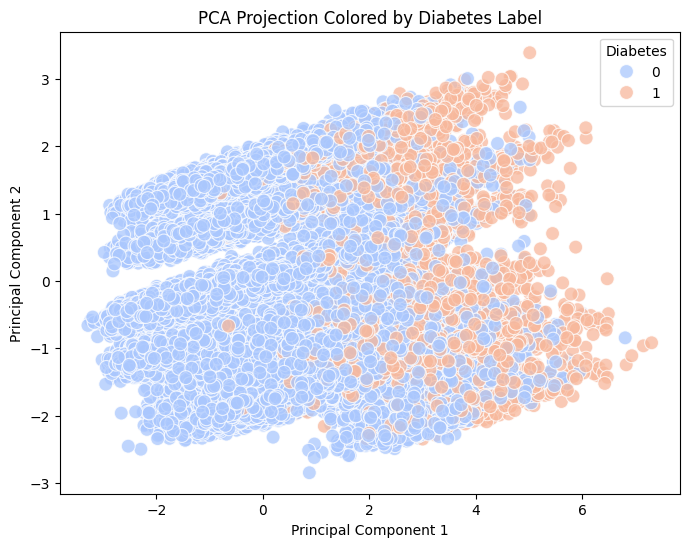

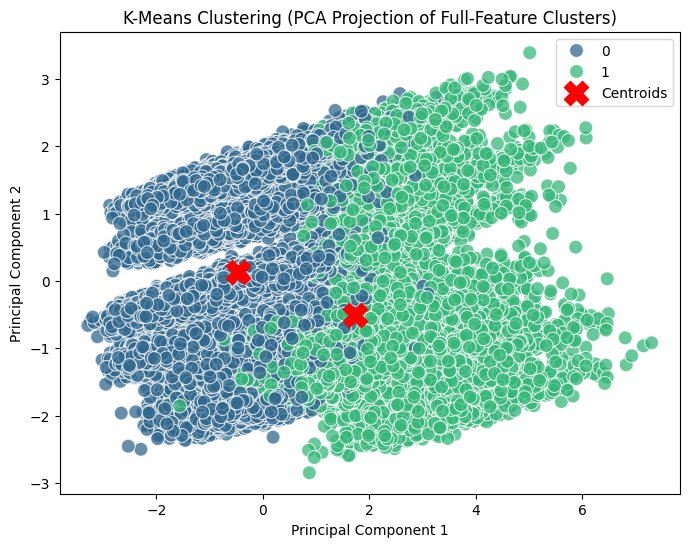

In [5]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=df_plot, x = 'PC1', y = 'PC2', hue = 'diabetes', palette ='coolwarm', s = 100, alpha = 0.75)
plt.title('PCA Projection Colored by Diabetes Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diabetes')
plt.show()

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_plot, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = 'viridis', s = 100, alpha = 0.75)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s = 300, c = 'red', marker = 'X', label = 'Centroids')
plt.title('K-Means Clustering (PCA Projection of Full-Feature Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### K-Means Clustering finds two groups that seem somewhat separated. If we know a variable is separable, this method can work well without labels. However, when we compare the diabetes indicator plot with the K-Means clusters, it's clear the data doesn’t separate well along the two principal components. So, the clusters aren’t very helpful in this case.



Confusion Matrix (aligned):
 [[74516 16984]
 [ 4224  4276]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88     91500
           1       0.20      0.50      0.29      8500

    accuracy                           0.79    100000
   macro avg       0.57      0.66      0.58    100000
weighted avg       0.88      0.79      0.83    100000

Adjusted Rand Index: 0.13462194546533746


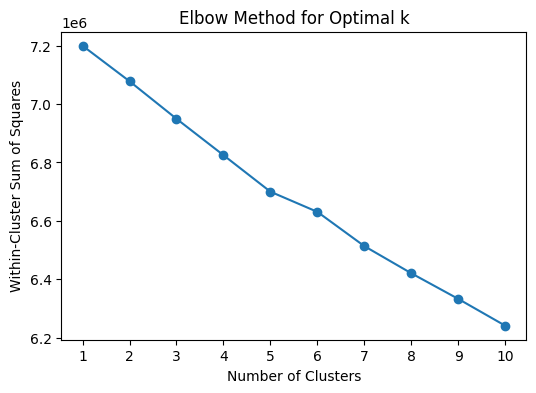

In [6]:
cm1 = confusion_matrix(y, cluster_labels)
cm2 = confusion_matrix(y, 1 - cluster_labels)
aligned_labels = cluster_labels if cm1.trace() >= cm2.trace() else 1 - cluster_labels

print("Confusion Matrix (aligned):\n", confusion_matrix(y, aligned_labels))
print("\nClassification Report:\n", classification_report(y, aligned_labels))
print("Adjusted Rand Index:", adjusted_rand_score(y, cluster_labels))

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize = (6, 4))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.xticks(range(1, 11))
plt.show()